# Probability Mass Function

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L=[]
for i in range(10000):
    L.append(random.randint(1,6))

In [4]:
len(L)

10000

In [5]:
L[:5]

[1, 1, 6, 5, 3]

In [6]:
pd.Series(L).value_counts()

6    1746
2    1682
1    1674
5    1667
4    1643
3    1588
Name: count, dtype: int64

In [9]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

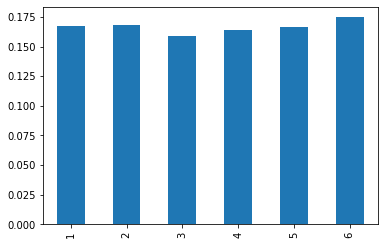

In [10]:
s.plot(kind='bar')

In [11]:
L=[]
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    L.append(a+b)

In [12]:
len(L)

10000

In [13]:
L[:5]

[6, 7, 6, 7, 7]

In [14]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [16]:
s

2     0.0237
3     0.0585
4     0.0823
5     0.1125
6     0.1372
7     0.1637
8     0.1420
9     0.1136
10    0.0819
11    0.0566
12    0.0280
Name: count, dtype: float64

<Axes: >

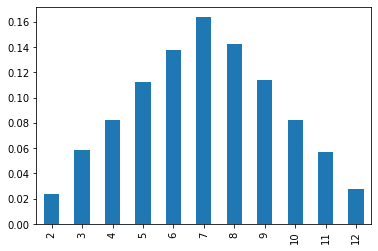

In [17]:
s.plot(kind='bar')

# CDF of a PMF

In [18]:
import numpy as np

In [19]:
np.cumsum(s)

2     0.0237
3     0.0822
4     0.1645
5     0.2770
6     0.4142
7     0.5779
8     0.7199
9     0.8335
10    0.9154
11    0.9720
12    1.0000
Name: count, dtype: float64

<Axes: >

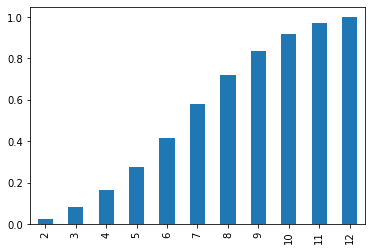

In [20]:
np.cumsum(s).plot(kind='bar')

# Parametric Destiny Estimation

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)

In [23]:
sample

array([48.57129213, 44.34826034, 51.21278597, 51.14490926, 49.59551741,
       46.57702588, 51.71012014, 45.81751205, 63.83721616, 52.19766035,
       56.26401145, 42.48258924, 55.57551724, 48.04536132, 53.2555349 ,
       51.28288264, 50.83758162, 40.00203445, 50.77972935, 40.57002157,
       45.12459587, 48.95232652, 59.8024987 , 50.31088791, 48.93337678,
       53.19209065, 46.3692882 , 46.66303702, 44.62585967, 47.21325815,
       51.08463322, 56.72407188, 48.8377204 , 55.17876833, 44.85079838,
       45.68375777, 47.35143633, 50.99436215, 41.11433266, 53.50937658,
       43.35042863, 49.00220631, 43.10189153, 46.55108683, 44.09927437,
       42.58330913, 56.51997955, 49.07402151, 61.64127345, 50.51781058,
       52.15539838, 40.81593508, 45.34539652, 52.20967148, 50.91454454,
       56.49529332, 49.36408455, 44.63054012, 49.72925459, 50.74021302,
       46.11276799, 48.06771493, 52.64754949, 51.35423485, 50.1270016 ,
       42.78346524, 49.87759532, 50.91029888, 54.03546474, 52.99

In [24]:
sample.mean()

50.0726040162647

(array([  2.,  14.,  49., 123., 184., 271., 199.,  97.,  50.,  11.]),
 array([33.30453351, 36.38462452, 39.46471553, 42.54480654, 45.62489755,
        48.70498857, 51.78507958, 54.86517059, 57.9452616 , 61.02535261,
        64.10544362]),
 <BarContainer object of 10 artists>)

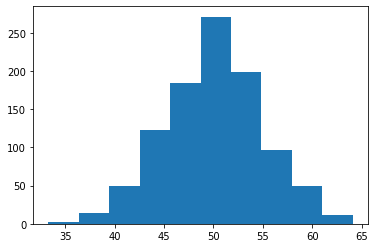

In [25]:
#plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [27]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [28]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [29]:
values = np.linspace(sample.min(), sample.max(),100)

In [30]:
sample.max()

64.10544361775356

In [31]:
probabilities = [dist.pdf(value) for value in values]

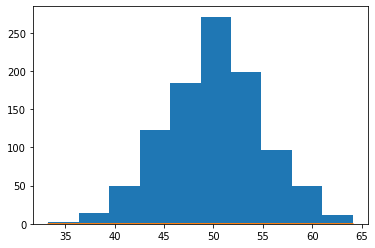

In [32]:
#plot the histogram and pdf
plt.hist(sample,bins=10)
plt.plot(values, probabilities)

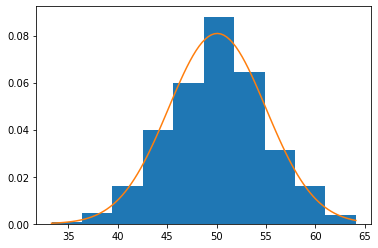

In [33]:
plt.hist(sample,bins=10, density = True)
plt.plot(values, probabilities)

C:\Users\HP\AppData\Local\Temp\ipykernel_5232\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

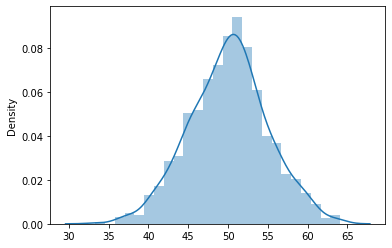

In [34]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [45]:
#generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1,sample2)) 

In [46]:
sample

array([19.64218388, 27.20272661, 18.30152817, 23.67983797, 18.12524302,
       26.81186293, 20.01406442, 17.13138807, 23.81325173, 22.15916983,
       16.74226963, 12.47608328, 21.38268311, 18.9516107 , 19.71007108,
       13.2181697 , 17.77253705, 26.63644351, 25.8369715 , 26.92685723,
       25.12816701, 13.23102657, 25.48384782, 23.09220759, 16.22136113,
       20.74515054, 12.38830104, 22.21585143, 17.75496012, 14.30862143,
       23.92828175, 22.73436889, 14.18206583, 15.86065761, 21.34989714,
       14.44783686, 24.5314687 , 19.12962644, 15.6236661 , 22.88439409,
       19.75286336, 10.23326928, 24.77212423, 22.15187662, 24.58287221,
       18.16586326, 25.21460196, 22.45922953, 17.2664786 , 20.3304892 ,
       20.6225296 , 25.15674106, 26.38576314, 26.35247366, 19.97981148,
       17.82893773, 20.67567517, 16.67535446, 18.48489291, 22.9161507 ,
       21.25838297, 14.89358076, 24.80638041, 10.08137547, 24.18459647,
       15.13391275, 20.44622154, 16.32262009, 20.1240001 , 15.05

(array([ 4.,  0.,  3.,  3.,  1.,  9.,  9., 10., 11., 21., 27., 26., 20.,
        28., 26., 23., 18., 18., 12., 13.,  8., 13.,  8., 13., 12., 19.,
        26., 32., 40., 43., 44., 73., 50., 55., 49., 51., 42., 29., 29.,
        31., 18.,  6., 11.,  9.,  3.,  1.,  0.,  1.,  1.,  1.]),
 array([ 6.55550637,  7.56341651,  8.57132664,  9.57923677, 10.5871469 ,
        11.59505703, 12.60296716, 13.61087729, 14.61878742, 15.62669755,
        16.63460768, 17.64251781, 18.65042794, 19.65833807, 20.6662482 ,
        21.67415833, 22.68206846, 23.68997859, 24.69788872, 25.70579885,
        26.71370898, 27.72161911, 28.72952924, 29.73743937, 30.7453495 ,
        31.75325963, 32.76116977, 33.7690799 , 34.77699003, 35.78490016,
        36.79281029, 37.80072042, 38.80863055, 39.81654068, 40.82445081,
        41.83236094, 42.84027107, 43.8481812 , 44.85609133, 45.86400146,
        46.87191159, 47.87982172, 48.88773185, 49.89564198, 50.90355211,
        51.91146224, 52.91937237, 53.9272825 , 54.93519263,

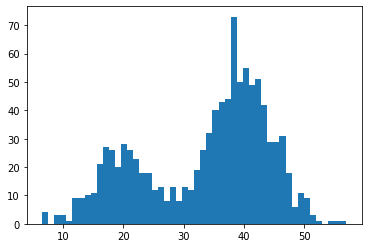

In [47]:
#plot histogram
plt.hist(sample,bins=50)

In [48]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=3, kernel='gaussian')

#convert data to a 2d array
sample = sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=3)

In [49]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [50]:
probabilities = model.score_samples(values)
proabilities = np.exp(probabilities)

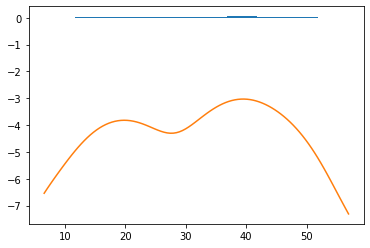

In [52]:
plt.hist(sample, bins=10, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

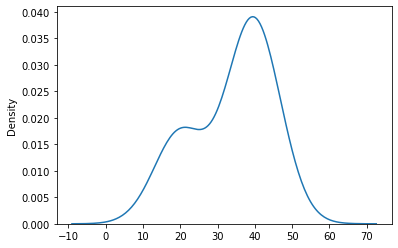

In [57]:
sns.kdeplot(sample.reshape(1000),bw_adjust=2)

# How to use PDF in Data Science

In [58]:
import seaborn as sns

In [59]:
df = sns.load_dataset('iris')

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='petal_length', ylabel='Density'>

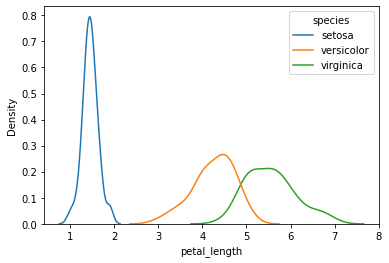

In [70]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

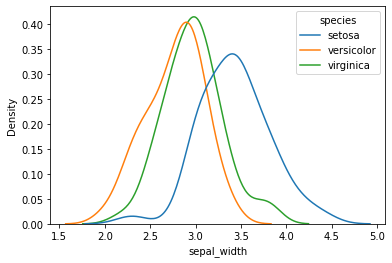

In [71]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

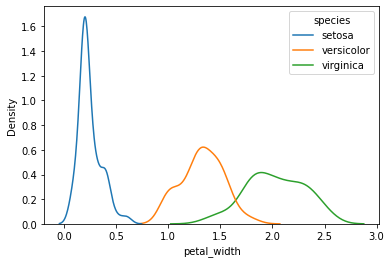

In [72]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

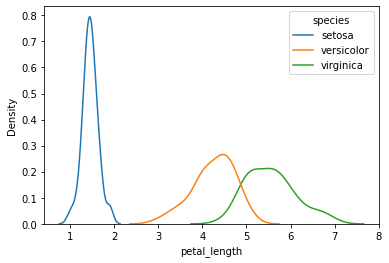

In [73]:
sns.kdeplot(data=df, x='petal_length', hue='species')

In [74]:
titanic = pd.read_csv('train.csv')

In [75]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

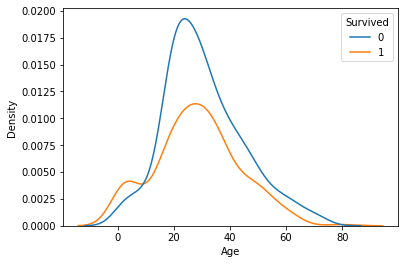

In [76]:
sns.kdeplot(data=titanic, x='Age', hue = 'Survived')

<Axes: xlabel='petal_width', ylabel='Density'>

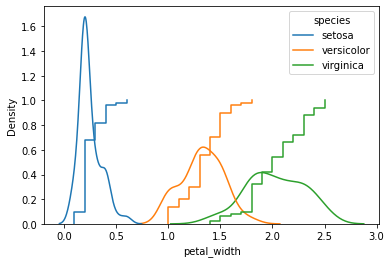

In [80]:
sns.kdeplot(data=df, x='petal_width', hue='species') #pdf
sns.ecdfplot(data=df, x='petal_width', hue='species') #cdf

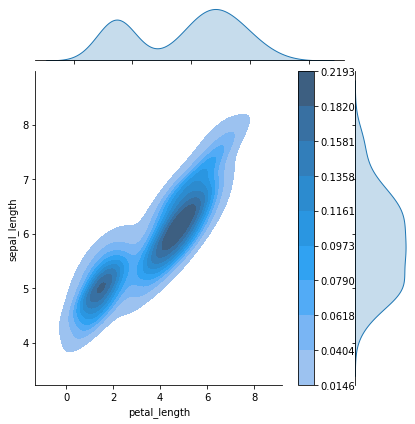

In [82]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar = True) #2d densing plot

# Standard Normal Variate

In [83]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

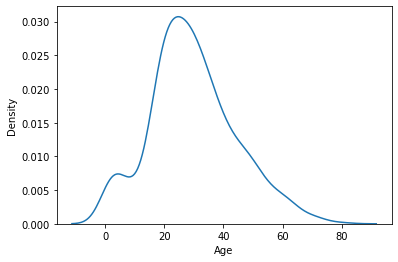

In [85]:
sns.kdeplot(titanic['Age'])

In [86]:
titanic['Age'].mean()

29.69911764705882

In [87]:
titanic['Age'].std()

14.526497332334042

In [88]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std() #standardizing

<Axes: xlabel='Age', ylabel='Density'>

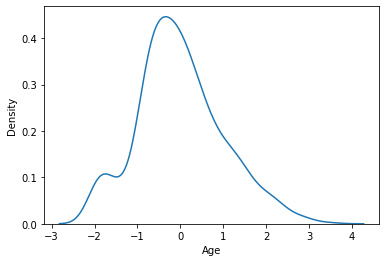

In [89]:
sns.kdeplot(x)

In [90]:
x.mean()

2.338621049070358e-16

In [91]:
x.std()

1.0

In [92]:
titanic['Age'].skew()

0.38910778230082704

In [94]:
titanic['Age'].mean()+3*titanic['Age'].std() #outlier

73.27860964406094

In [95]:
titanic['Age'].mean()-3*titanic['Age'].std() #outlier

-13.880374349943303

In [97]:
titanic[(titanic['Age'] > 73)] #outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
